In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

from matplotlib import pyplot as plt

In [5]:
# perfs = pd.read_excel('../FinalProject/WellInfo_Cleaned.xlsx', sheet_name='Perfs_Productions') 
# perfs.head()

In [6]:
#Connect to local database
from sqlalchemy import create_engine
rds_connection_string = "postgres:postgres@localhost:5432/PerfsFracs"
engine = create_engine(f'postgresql://{rds_connection_string}')
conn=engine.connect()

# load perfs and fracs into pandas
perfs = pd.read_sql("SELECT * FROM perfs",conn)
fracs = pd.read_sql("SELECT * FROM fracs",conn)

In [7]:
fracs

,Well,MD,Perfed,Fracced,Cored,DST,Lithology,Age,LithoCode,PerfObservation,...,WaterRate,CumOil,MaxOil,BeforeFrac,Normalised,FracDate,FracSize,BeforeProd,AfterProd,FracUplift
0,P-103,753,1,1,0,0,andesitic tuff fine-grained,K2cp,5.0,None,...,0.76,181022.0,283.0,49.0,86582,34639.0,8.0,148.20,1444.00,9.74359
1,P-103,754,1,1,0,0,andesitic tuff fine-grained,K2cp,5.0,None,...,0.76,181022.0,283.0,49.0,86582,34639.0,8.0,148.20,1444.00,9.74359
2,P-103,755,1,1,0,0,andesitic tuff fine-grained,K2cp,5.0,None,...,0.76,181022.0,283.0,49.0,86582,34639.0,8.0,148.20,1444.00,9.74359
3,P-103,756,1,1,0,0,andesitic tuff fine-grained,K2cp,5.0,None,...,0.76,181022.0,283.0,49.0,86582,34639.0,8.0,148.20,1444.00,9.74359
4,P-103,757,1,1,0,0,andesitic tuff fine-grained,K2cp,5.0,None,...,0.76,181022.0,283.0,49.0,86582,34639.0,8.0,148.20,1444.00,9.74359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1105,P-53,780,0,1,0,0,andesitic tuff fine-grained,K1al-K2cm,5.0,None,...,1.07,162396.0,245.0,61.0,76906,34669.0,NaN,88.96,772.84,8.68750
1106,P-53,781,0,1,0,0,andesitic tuff fine-grained,K1al-K2cm,5.0,None,...,1.07,162396.0,245.0,61.0,76906,34669.0,NaN,88.96,772.84,8.68750
1107,P-53,839,0,1,0,1,andesitic tuff fine-grained,K1al-K2cm,5.0,None,...,1.07,162396.0,245.0,61.0,76906,34669.0,NaN,88.96,772.84,8.68750
1108,P-53,840,0,1,0,1,andesitic tuff fine-grained,K1al-K2cm,5.0,None,...,1.07,162396.0,245.0,61.0,76906,34669.0,NaN,88.96,772.84,8.68750


In [8]:
# data = perfs
# convert_dict = {'Age': str, 
#                 'Lithology': str
#                } 
# data = data.astype(convert_dict) 
# print(data.dtypes) 
# # data = data["Lithology"].astype(str)
# data

In [9]:
perfs = perfs.drop(columns=['API_PVT', 'API_CUPET', 'DIFF_API', 'GasGravity', 'OilGravity', 'P_Sat', 'Uo', 'Ug', 'Bo', 'Bg', 'CO2', 'H2S', 'InitialRate', 'CurrentRate', 'CurrentWC', 'WaterRate', 'MaxOil', 'BeforeFrac', 'Normalised', 'FracSize', 'BeforeFracProd', 'AfterFracProd'])
perfs

,Well,MD,Perfed,Fracced,Lithology,Age,API_Avg,CumOil
0,P-142,661.0,1.0,0.0,claystone/marl,P21,NaN,169.0
1,P-142,662.0,1.0,0.0,claystone/marl,P21,NaN,169.0
2,P-142,663.0,1.0,0.0,claystone/marl,P21,NaN,169.0
3,P-142,664.0,1.0,0.0,claystone/marl,P21,NaN,169.0
4,P-142,665.0,1.0,0.0,claystone/marl,P21,NaN,169.0
...,...,...,...,...,...,...,...,...
11956,B-4,1343.0,1.0,0.0,andesitic tuff coarse-grained,K1al,43.191358,NaN
11957,B-4,1344.0,1.0,0.0,andesitic tuff coarse-grained,K1al,43.191358,NaN
11958,B-4,1345.0,1.0,0.0,andesitic tuff coarse-grained,K1al,43.191358,NaN
11959,B-4,1346.0,1.0,0.0,andesitic tuff coarse-grained,K1al,43.191358,NaN


In [10]:
perfs = perfs.dropna()
perfs

,Well,MD,Perfed,Fracced,Lithology,Age,API_Avg,CumOil
556,P-134,1046.0,1.0,0.0,andesitic tuff fine-grained,K2cp,22.387983,10731.0
557,P-134,1047.0,1.0,0.0,andesitic tuff fine-grained,K2cp,22.387983,10731.0
558,P-134,1048.0,1.0,0.0,andesitic tuff fine-grained,K2cp,22.387983,10731.0
559,P-134,1049.0,1.0,0.0,andesitic tuff fine-grained,K2cp,22.387983,10731.0
560,P-134,1050.0,1.0,0.0,andesitic tuff fine-grained,K2cp,22.387983,10731.0
...,...,...,...,...,...,...,...,...
10067,P-124,1023.0,1.0,0.0,andesite,K1al-K2cm,18.208618,634140.0
10068,P-124,1024.0,1.0,0.0,andesite,K1al-K2cm,18.208618,634140.0
10069,P-124,1067.0,1.0,0.0,andesitic tuff coarse-grained,K1al-K2cm,18.208618,634140.0
10070,P-124,1068.0,1.0,0.0,andesitic tuff coarse-grained,K1al-K2cm,18.208618,634140.0


In [11]:
target = perfs["CumOil"].values.reshape(-1,1)
print(target)
target

[[ 10731.]
 [ 10731.]
 [ 10731.]
 ...
 [634140.]
 [634140.]
 [634140.]]


array([[ 10731.],
       [ 10731.],
       [ 10731.],
       ...,
       [634140.],
       [634140.],
       [634140.]])

In [12]:
perfs = perfs.drop(columns=['CumOil','Well'])
perfs

,MD,Perfed,Fracced,Lithology,Age,API_Avg
556,1046.0,1.0,0.0,andesitic tuff fine-grained,K2cp,22.387983
557,1047.0,1.0,0.0,andesitic tuff fine-grained,K2cp,22.387983
558,1048.0,1.0,0.0,andesitic tuff fine-grained,K2cp,22.387983
559,1049.0,1.0,0.0,andesitic tuff fine-grained,K2cp,22.387983
560,1050.0,1.0,0.0,andesitic tuff fine-grained,K2cp,22.387983
...,...,...,...,...,...,...
10067,1023.0,1.0,0.0,andesite,K1al-K2cm,18.208618
10068,1024.0,1.0,0.0,andesite,K1al-K2cm,18.208618
10069,1067.0,1.0,0.0,andesitic tuff coarse-grained,K1al-K2cm,18.208618
10070,1068.0,1.0,0.0,andesitic tuff coarse-grained,K1al-K2cm,18.208618


In [13]:
perfs_binary_encoded = pd.get_dummies(perfs, columns=["Lithology","Age"])
perfs_binary_encoded

,MD,Perfed,Fracced,API_Avg,Lithology_andesite,Lithology_andesitic tuff coarse-grained,Lithology_andesitic tuff fine-grained,Lithology_andesitic tuff med-grained,Lithology_andestic tuff,Lithology_argillaceous tuff,...,Lithology_polylithic sst,Lithology_tuffaceous cong,Lithology_tuffaceous lst,Age_K1al-K2cm,Age_K1al-K2tu,Age_K1ap-al,Age_K2cp,Age_K2upmaas,Age_P21,Age_P22
556,1046.0,1.0,0.0,22.387983,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
557,1047.0,1.0,0.0,22.387983,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
558,1048.0,1.0,0.0,22.387983,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
559,1049.0,1.0,0.0,22.387983,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
560,1050.0,1.0,0.0,22.387983,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10067,1023.0,1.0,0.0,18.208618,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
10068,1024.0,1.0,0.0,18.208618,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
10069,1067.0,1.0,0.0,18.208618,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
10070,1068.0,1.0,0.0,18.208618,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [14]:
perfs_binary_encoded.columns

Index(['MD', 'Perfed', 'Fracced', 'API_Avg', 'Lithology_andesite',
       'Lithology_andesitic tuff coarse-grained',
       'Lithology_andesitic tuff fine-grained',
       'Lithology_andesitic tuff med-grained', 'Lithology_andestic tuff',
       'Lithology_argillaceous tuff', 'Lithology_basalt',
       'Lithology_basaltic tuff', 'Lithology_breccia',
       'Lithology_claystone/marl', 'Lithology_limestone',
       'Lithology_polylithic cong', 'Lithology_polylithic sst',
       'Lithology_tuffaceous cong', 'Lithology_tuffaceous lst',
       'Age_K1al-K2cm', 'Age_K1al-K2tu', 'Age_K1ap-al', 'Age_K2cp',
       'Age_K2upmaas', 'Age_P21', 'Age_P22'],
      dtype='object')

In [15]:
perfs_binary_encoded = perfs_binary_encoded.drop(columns=['Age_P22', 'Lithology_limestone','API_Avg', 'MD', 'Fracced', 'Perfed' ])


In [16]:
perfs_binary_encoded

,Lithology_andesite,Lithology_andesitic tuff coarse-grained,Lithology_andesitic tuff fine-grained,Lithology_andesitic tuff med-grained,Lithology_andestic tuff,Lithology_argillaceous tuff,Lithology_basalt,Lithology_basaltic tuff,Lithology_breccia,Lithology_claystone/marl,Lithology_polylithic cong,Lithology_polylithic sst,Lithology_tuffaceous cong,Lithology_tuffaceous lst,Age_K1al-K2cm,Age_K1al-K2tu,Age_K1ap-al,Age_K2cp,Age_K2upmaas,Age_P21
556,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
557,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
558,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
559,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
560,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10067,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
10068,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
10069,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
10070,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [17]:
# Fit the classifier with default hyper-parameters
clf = DecisionTreeRegressor(random_state=1234, max_depth=4)
DT_model = clf.fit(perfs_binary_encoded, target)

In [18]:
# text_representation = tree.export_text(clf)
# print(text_representation)

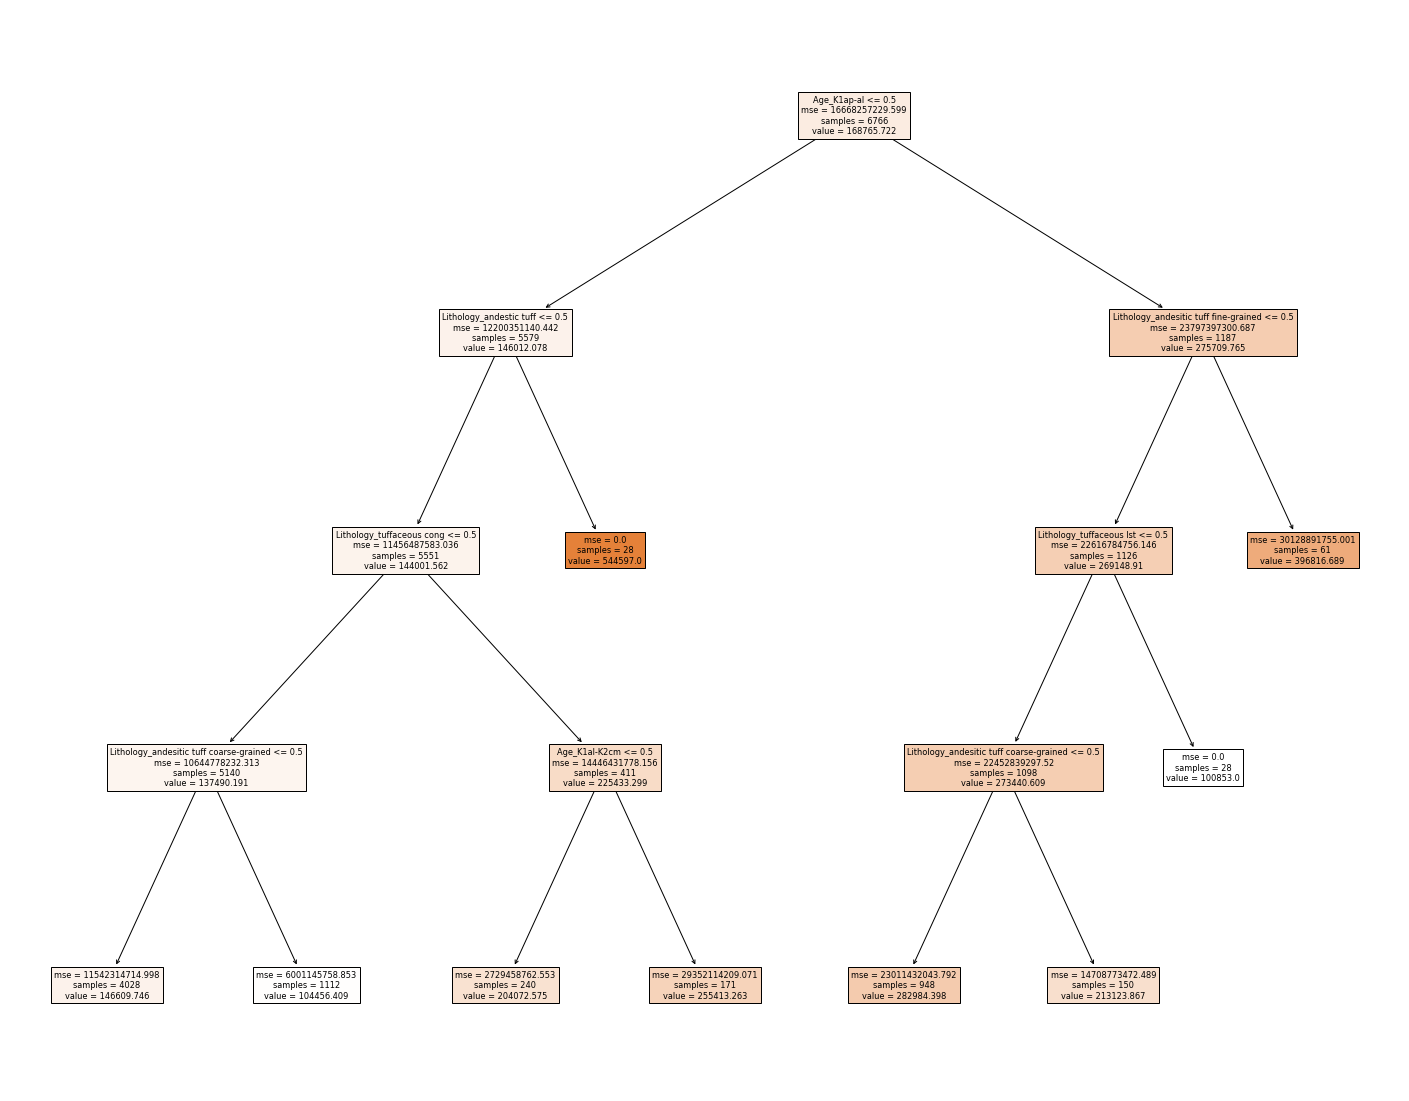

In [19]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=perfs_binary_encoded.columns,  
                   filled=True)

In [20]:
fig.savefig("decistion_tree.png")

In [21]:
# Create a decision tree graph
# import graphviz 
# dot_data = tree.export_graphviz(
#     clf, out_file=None, 
#     feature_names=data_binary_encoded.columns,  
#     filled=True, rounded=True,  
#     special_characters=True)  

# import pydotplus
# graph = pydotplus.graph_from_dot_data(dot_data)
# graph.write_png('iris.png')

# graph = graphviz.Source(dot_data)  
# graph 

In [22]:
# Create a random forest classifier
rf = RandomForestRegressor(n_estimators=200)
rf = rf.fit(perfs_binary_encoded, target)
rf.score(perfs_binary_encoded, target)

0.3022688026590894

In [23]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf.feature_importances_
importances

array([5.96400116e-03, 6.63340223e-02, 3.22926223e-02, 8.32536178e-03,
       1.31379154e-01, 2.37905721e-04, 1.51863896e-02, 1.64200903e-03,
       4.71881042e-03, 5.20648530e-03, 1.55083588e-02, 8.93943947e-04,
       9.38983943e-02, 2.93874778e-02, 2.10899527e-02, 2.68030368e-02,
       4.77846664e-01, 1.90061880e-02, 5.04015765e-03, 3.92390636e-02])

In [24]:
# We can sort the features by their importance
sorted(zip(rf.feature_importances_, perfs_binary_encoded.columns), reverse=True)

[(0.4778466644845479, 'Age_K1ap-al'),
 (0.1313791544659787, 'Lithology_andestic tuff'),
 (0.09389839427527596, 'Lithology_tuffaceous cong'),
 (0.06633402225407829, 'Lithology_andesitic tuff coarse-grained'),
 (0.03923906357157891, 'Age_P21'),
 (0.03229262225994263, 'Lithology_andesitic tuff fine-grained'),
 (0.029387477842728257, 'Lithology_tuffaceous lst'),
 (0.026803036844321233, 'Age_K1al-K2tu'),
 (0.02108995265178723, 'Age_K1al-K2cm'),
 (0.01900618800662042, 'Age_K2cp'),
 (0.015508358763011425, 'Lithology_polylithic cong'),
 (0.015186389581709665, 'Lithology_basalt'),
 (0.008325361775689006, 'Lithology_andesitic tuff med-grained'),
 (0.005964001156787489, 'Lithology_andesite'),
 (0.005206485302721524, 'Lithology_claystone/marl'),
 (0.005040157646543768, 'Age_K2upmaas'),
 (0.0047188104178634395, 'Lithology_breccia'),
 (0.0016420090308945116, 'Lithology_basaltic tuff'),
 (0.0008939439467342692, 'Lithology_polylithic sst'),
 (0.0002379057211855412, 'Lithology_argillaceous tuff')]

In [25]:
Prod_Forest = pd.DataFrame(sorted(zip(rf.feature_importances_, perfs_binary_encoded.columns), reverse=True))
Prod_Forest

,0,1
0,0.477847,Age_K1ap-al
1,0.131379,Lithology_andestic tuff
2,0.093898,Lithology_tuffaceous cong
3,0.066334,Lithology_andesitic tuff coarse-grained
4,0.039239,Age_P21
5,0.032293,Lithology_andesitic tuff fine-grained
6,0.029387,Lithology_tuffaceous lst
7,0.026803,Age_K1al-K2tu
8,0.021090,Age_K1al-K2cm
9,0.019006,Age_K2cp


In [26]:
Prod_Forest.to_html('Prod_Forest_data.html')

In [27]:
## Fracking
# fracs = pd.read_excel('../FinalProject/WellInfo_Cleaned2.xlsx', sheet_name='Fracs') 
# fracs

In [28]:
convert_dict = {'Age': str, 
                'Lithology': str
               } 
fracs = fracs.astype(convert_dict) 
print(fracs.dtypes) 
# data = data["Lithology"].astype(str)
fracs = fracs.drop(columns=['Perfed', 'API_PVT', 'API_CUPET', 'DIFF_API', 'GasGravity', 'OilGravity', 'P_Sat', 'Uo', 'Ug', 'Bo', 'Bg', 'CO2', 'H2S', 'InitialRate', 'CurrentRate', 'CurrentWC', 'WaterRate', 'MaxOil', 'BeforeFrac', 'Normalised', 'LithoCode', 'PerfObservation', 'PerfAPI'])
fracs

Well                object
MD                   int64
Perfed               int64
Fracced              int64
Cored                int64
DST                  int64
Lithology           object
Age                 object
LithoCode          float64
PerfObservation     object
PerfAPI            float64
PerfDate            object
results             object
API_PVT            float64
API_CUPET          float64
DIFF_API           float64
GasGravity         float64
OilGravity         float64
P_Sat              float64
Pb                  object
Uo                 float64
Ug                  object
Bo                 float64
Bg                 float64
CO2                float64
H2S                float64
Sw                   int64
InitialRate        float64
CurrentRate        float64
CurrentWC          float64
WaterRate          float64
CumOil             float64
MaxOil             float64
BeforeFrac         float64
Normalised           int64
FracDate           float64
FracSize           float64
B

,Well,MD,Fracced,Cored,DST,Lithology,Age,PerfDate,results,Pb,Sw,CumOil,FracDate,FracSize,BeforeProd,AfterProd,FracUplift
0,P-103,753,1,0,0,andesitic tuff fine-grained,K2cp,34759,OIL ENTRY,None,74550,181022.0,34639.0,8.0,148.20,1444.00,9.74359
1,P-103,754,1,0,0,andesitic tuff fine-grained,K2cp,34759,OIL ENTRY,None,74550,181022.0,34639.0,8.0,148.20,1444.00,9.74359
2,P-103,755,1,0,0,andesitic tuff fine-grained,K2cp,34759,OIL ENTRY,None,74550,181022.0,34639.0,8.0,148.20,1444.00,9.74359
3,P-103,756,1,0,0,andesitic tuff fine-grained,K2cp,34759,OIL ENTRY,None,74550,181022.0,34639.0,8.0,148.20,1444.00,9.74359
4,P-103,757,1,0,0,andesitic tuff fine-grained,K2cp,34759,OIL ENTRY,None,74550,181022.0,34639.0,8.0,148.20,1444.00,9.74359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1105,P-53,780,1,0,0,andesitic tuff fine-grained,K1al-K2cm,None,None,None,0,162396.0,34669.0,NaN,88.96,772.84,8.68750
1106,P-53,781,1,0,0,andesitic tuff fine-grained,K1al-K2cm,None,None,None,0,162396.0,34669.0,NaN,88.96,772.84,8.68750
1107,P-53,839,1,0,1,andesitic tuff fine-grained,K1al-K2cm,None,None,None,0,162396.0,34669.0,NaN,88.96,772.84,8.68750
1108,P-53,840,1,0,1,andesitic tuff fine-grained,K1al-K2cm,None,None,None,0,162396.0,34669.0,NaN,88.96,772.84,8.68750


In [29]:
fracs

,Well,MD,Fracced,Cored,DST,Lithology,Age,PerfDate,results,Pb,Sw,CumOil,FracDate,FracSize,BeforeProd,AfterProd,FracUplift
0,P-103,753,1,0,0,andesitic tuff fine-grained,K2cp,34759,OIL ENTRY,None,74550,181022.0,34639.0,8.0,148.20,1444.00,9.74359
1,P-103,754,1,0,0,andesitic tuff fine-grained,K2cp,34759,OIL ENTRY,None,74550,181022.0,34639.0,8.0,148.20,1444.00,9.74359
2,P-103,755,1,0,0,andesitic tuff fine-grained,K2cp,34759,OIL ENTRY,None,74550,181022.0,34639.0,8.0,148.20,1444.00,9.74359
3,P-103,756,1,0,0,andesitic tuff fine-grained,K2cp,34759,OIL ENTRY,None,74550,181022.0,34639.0,8.0,148.20,1444.00,9.74359
4,P-103,757,1,0,0,andesitic tuff fine-grained,K2cp,34759,OIL ENTRY,None,74550,181022.0,34639.0,8.0,148.20,1444.00,9.74359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1105,P-53,780,1,0,0,andesitic tuff fine-grained,K1al-K2cm,None,None,None,0,162396.0,34669.0,NaN,88.96,772.84,8.68750
1106,P-53,781,1,0,0,andesitic tuff fine-grained,K1al-K2cm,None,None,None,0,162396.0,34669.0,NaN,88.96,772.84,8.68750
1107,P-53,839,1,0,1,andesitic tuff fine-grained,K1al-K2cm,None,None,None,0,162396.0,34669.0,NaN,88.96,772.84,8.68750
1108,P-53,840,1,0,1,andesitic tuff fine-grained,K1al-K2cm,None,None,None,0,162396.0,34669.0,NaN,88.96,772.84,8.68750


In [30]:
fracs = fracs.drop(columns=['PerfDate', 'results', 'Pb' ])
fracs

,Well,MD,Fracced,Cored,DST,Lithology,Age,Sw,CumOil,FracDate,FracSize,BeforeProd,AfterProd,FracUplift
0,P-103,753,1,0,0,andesitic tuff fine-grained,K2cp,74550,181022.0,34639.0,8.0,148.20,1444.00,9.74359
1,P-103,754,1,0,0,andesitic tuff fine-grained,K2cp,74550,181022.0,34639.0,8.0,148.20,1444.00,9.74359
2,P-103,755,1,0,0,andesitic tuff fine-grained,K2cp,74550,181022.0,34639.0,8.0,148.20,1444.00,9.74359
3,P-103,756,1,0,0,andesitic tuff fine-grained,K2cp,74550,181022.0,34639.0,8.0,148.20,1444.00,9.74359
4,P-103,757,1,0,0,andesitic tuff fine-grained,K2cp,74550,181022.0,34639.0,8.0,148.20,1444.00,9.74359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1105,P-53,780,1,0,0,andesitic tuff fine-grained,K1al-K2cm,0,162396.0,34669.0,NaN,88.96,772.84,8.68750
1106,P-53,781,1,0,0,andesitic tuff fine-grained,K1al-K2cm,0,162396.0,34669.0,NaN,88.96,772.84,8.68750
1107,P-53,839,1,0,1,andesitic tuff fine-grained,K1al-K2cm,0,162396.0,34669.0,NaN,88.96,772.84,8.68750
1108,P-53,840,1,0,1,andesitic tuff fine-grained,K1al-K2cm,0,162396.0,34669.0,NaN,88.96,772.84,8.68750


In [31]:
fracs2 = fracs.dropna()
fracs2

,Well,MD,Fracced,Cored,DST,Lithology,Age,Sw,CumOil,FracDate,FracSize,BeforeProd,AfterProd,FracUplift
0,P-103,753,1,0,0,andesitic tuff fine-grained,K2cp,74550,181022.0,34639.0,8.0,148.2,1444.0,9.743590
1,P-103,754,1,0,0,andesitic tuff fine-grained,K2cp,74550,181022.0,34639.0,8.0,148.2,1444.0,9.743590
2,P-103,755,1,0,0,andesitic tuff fine-grained,K2cp,74550,181022.0,34639.0,8.0,148.2,1444.0,9.743590
3,P-103,756,1,0,0,andesitic tuff fine-grained,K2cp,74550,181022.0,34639.0,8.0,148.2,1444.0,9.743590
4,P-103,757,1,0,0,andesitic tuff fine-grained,K2cp,74550,181022.0,34639.0,8.0,148.2,1444.0,9.743590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,P-139,1043,1,0,0,andesitic tuff fine-grained,K1al-K2cm,99400,125563.0,34881.0,8.5,120.0,400.0,3.333333
1100,P-3,962,1,0,1,andesitic tuff fine-grained,K2cp,75283,522585.0,34639.0,8.0,490.0,4900.0,10.000000
1101,P-3,963,1,0,1,andesitic tuff fine-grained,K2cp,75283,522585.0,34639.0,8.0,490.0,4900.0,10.000000
1102,P-3,964,1,0,1,andesitic tuff fine-grained,K2cp,75283,522585.0,34639.0,8.0,490.0,4900.0,10.000000


In [32]:
frac_target = fracs2["FracUplift"].values.reshape(-1,1)
print(frac_target)
frac_target

[[ 9.74358974]
 [ 9.74358974]
 [ 9.74358974]
 [ 9.74358974]
 [ 9.74358974]
 [ 9.74358974]
 [ 9.74358974]
 [ 9.74358974]
 [ 9.74358974]
 [ 9.74358974]
 [ 9.74358974]
 [ 9.74358974]
 [ 9.74358974]
 [ 9.74358974]
 [ 9.74358974]
 [ 9.74358974]
 [ 9.74358974]
 [ 9.74358974]
 [ 9.74358974]
 [ 9.74358974]
 [ 9.74358974]
 [ 9.74358974]
 [ 9.74358974]
 [ 9.74358974]
 [ 9.74358974]
 [ 9.74358974]
 [ 9.74358974]
 [ 9.74358974]
 [ 4.16666667]
 [ 4.16666667]
 [ 4.16666667]
 [ 4.16666667]
 [ 4.16666667]
 [ 4.16666667]
 [ 4.16666667]
 [ 4.16666667]
 [ 4.16666667]
 [ 4.16666667]
 [ 4.16666667]
 [ 4.16666667]
 [ 4.16666667]
 [ 4.16666667]
 [ 4.16666667]
 [ 4.16666667]
 [ 4.16666667]
 [ 4.16666667]
 [ 4.16666667]
 [ 4.16666667]
 [ 4.16666667]
 [ 4.16666667]
 [ 4.16666667]
 [ 4.16666667]
 [ 4.16666667]
 [ 4.16666667]
 [ 4.16666667]
 [ 4.16666667]
 [ 4.16666667]
 [ 4.16666667]
 [ 4.16666667]
 [ 4.16666667]
 [ 4.16666667]
 [ 4.16666667]
 [ 4.16666667]
 [ 4.16666667]
 [ 4.16666667]
 [ 4.16666667]
 [ 4.16666

array([[ 9.74358974],
       [ 9.74358974],
       [ 9.74358974],
       [ 9.74358974],
       [ 9.74358974],
       [ 9.74358974],
       [ 9.74358974],
       [ 9.74358974],
       [ 9.74358974],
       [ 9.74358974],
       [ 9.74358974],
       [ 9.74358974],
       [ 9.74358974],
       [ 9.74358974],
       [ 9.74358974],
       [ 9.74358974],
       [ 9.74358974],
       [ 9.74358974],
       [ 9.74358974],
       [ 9.74358974],
       [ 9.74358974],
       [ 9.74358974],
       [ 9.74358974],
       [ 9.74358974],
       [ 9.74358974],
       [ 9.74358974],
       [ 9.74358974],
       [ 9.74358974],
       [ 4.16666667],
       [ 4.16666667],
       [ 4.16666667],
       [ 4.16666667],
       [ 4.16666667],
       [ 4.16666667],
       [ 4.16666667],
       [ 4.16666667],
       [ 4.16666667],
       [ 4.16666667],
       [ 4.16666667],
       [ 4.16666667],
       [ 4.16666667],
       [ 4.16666667],
       [ 4.16666667],
       [ 4.16666667],
       [ 4.16666667],
       [ 4

In [33]:
fracs2 = fracs2.drop(columns=['FracUplift','Well','Fracced', 'MD', 'AfterProd', 'CumOil', 'BeforeProd', 'FracDate'])


In [34]:
fracs_binary_encoded = pd.get_dummies(fracs2, columns=["Lithology","Age",'DST'])
fracs_binary_encoded

,Cored,Sw,FracSize,Lithology_andesite,Lithology_andesitic tuff coarse-grained,Lithology_andesitic tuff fine-grained,Lithology_andesitic tuff med-grained,Lithology_andestic tuff,Lithology_basalt,Lithology_tuffaceous cong,Age_K1al-K2cm,Age_K1ap-al,Age_K2cp,DST_0,DST_1
0,0,74550,8.0,0,0,1,0,0,0,0,0,0,1,1,0
1,0,74550,8.0,0,0,1,0,0,0,0,0,0,1,1,0
2,0,74550,8.0,0,0,1,0,0,0,0,0,0,1,1,0
3,0,74550,8.0,0,0,1,0,0,0,0,0,0,1,1,0
4,0,74550,8.0,0,0,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,0,99400,8.5,0,0,1,0,0,0,0,1,0,0,1,0
1100,0,75283,8.0,0,0,1,0,0,0,0,0,0,1,0,1
1101,0,75283,8.0,0,0,1,0,0,0,0,0,0,1,0,1
1102,0,75283,8.0,0,0,1,0,0,0,0,0,0,1,0,1


In [35]:
fracs_binary_encoded.columns


Index(['Cored', 'Sw', 'FracSize', 'Lithology_andesite',
       'Lithology_andesitic tuff coarse-grained',
       'Lithology_andesitic tuff fine-grained',
       'Lithology_andesitic tuff med-grained', 'Lithology_andestic tuff',
       'Lithology_basalt', 'Lithology_tuffaceous cong', 'Age_K1al-K2cm',
       'Age_K1ap-al', 'Age_K2cp', 'DST_0', 'DST_1'],
      dtype='object')

In [36]:
# data_binary_encoded = data_binary_encoded.drop(columns=['Age_nan', 'Lithology_nan', 'Age_P22', 'Lithology_limestone'])


In [37]:
# Create a random forest classifier
frac_rf = RandomForestRegressor(n_estimators=200)
frac_rf = frac_rf.fit(fracs_binary_encoded, frac_target)
frac_rf.score(fracs_binary_encoded, frac_target)


0.8576769152402393

In [38]:
# Random Forests in sklearn will automatically calculate feature importance
importances2 = rf.feature_importances_
importances2
sorted(zip(frac_rf.feature_importances_, fracs_binary_encoded.columns), reverse=True)

[(0.5159066515126762, 'Sw'),
 (0.2892916178460856, 'FracSize'),
 (0.039101107839104844, 'Lithology_andesitic tuff fine-grained'),
 (0.03629298342330062, 'Age_K1ap-al'),
 (0.021669837569384055, 'Lithology_andesite'),
 (0.01905239908578202, 'Age_K1al-K2cm'),
 (0.015320479058929422, 'Lithology_andesitic tuff med-grained'),
 (0.01473744477463586, 'Age_K2cp'),
 (0.012030832046560984, 'Lithology_andesitic tuff coarse-grained'),
 (0.009698105367632267, 'Lithology_tuffaceous cong'),
 (0.009413325819260547, 'Lithology_basalt'),
 (0.00814685170267068, 'DST_1'),
 (0.00662060791024223, 'DST_0'),
 (0.0026788041576517054, 'Cored'),
 (3.895188608278259e-05, 'Lithology_andestic tuff')]

In [39]:
Frac_Forest = pd.DataFrame(sorted(zip(frac_rf.feature_importances_, fracs_binary_encoded.columns), reverse=True))

Frac_Forest

,0,1
0,0.515907,Sw
1,0.289292,FracSize
2,0.039101,Lithology_andesitic tuff fine-grained
3,0.036293,Age_K1ap-al
4,0.021670,Lithology_andesite
5,0.019052,Age_K1al-K2cm
6,0.015320,Lithology_andesitic tuff med-grained
7,0.014737,Age_K2cp
8,0.012031,Lithology_andesitic tuff coarse-grained
9,0.009698,Lithology_tuffaceous cong


In [40]:

Frac_Forest.to_html('Frac_Forest_data.html')

In [41]:
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
# import seaborn as sns

In [42]:
https://www.tensorflow.org/tutorials/keras/regression

SyntaxError: invalid syntax (<ipython-input-42-2de2a660b14e>, line 1)